In [9]:
import os
"""
    Getting all the class mapping
"""
root = "datasets"
with open(os.path.join(root, "logo", "List", "Logo-2K+classes.txt")) as file:
    class_names = file.read()

class_names = class_names.split("\n")
for index, item in enumerate(class_names):
    class_names[index] = f"{index}: {class_names[index]}"
    print(class_names[index])



0: 24seven
1: Ace
2: aceh
3: Admiral
4: Aetrex
5: Agio
6: Aim
7: Akubra
8: ALAN
9: Alexia
10: Allstar
11: ara
12: Artemide
13: Ashbury
14: Atlantic
15: Atlantic Airlines
16: Audar
17: Aurora
18: Avanti
19: Baba
20: BACCARAT
21: BAE
22: Baker Skateboards
23: Balance
24: Bandit
25: Barcelo
26: Basso
27: Beeline
28: Berghaus
29: Berkshire
30: Bexley
31: Black and Red
32: Black Label Skateboards
33: Bobdog
34: Bona
35: Boscov's
36: BOSS
37: Boxfresh
38: Braun
39: Bravo
40: Breguet
41: BridgePort
42: Brooke
43: Brooklyn
44: BT
45: Butler
46: Buxton
47: C&M Airways
48: Cabana
49: Calypso
50: Carhartt
51: Cartier
52: Casa Blanca
53: Casino
54: Centurion
55: CHRISTOFLE
56: Church's
57: CMC
58: Colt
59: Consort
60: Converse
61: Cresta
62: Crown
63: Crumpler
64: Crystal
65: Dansko
66: DC Shoes
67: diamond
68: Dignity
69: Domestos
70: Domino
71: Domus
72: Don Jose
73: Dor
74: Drifter
75: DUX
76: DVS Shoes
77: DY
78: Eagle Creek
79: Eastpak
80: Ecco
81: Elbe
82: Emerica
83: Emo
84: Estrella
85: Et

In [19]:
root = "datasets"

for case in ["train", "test"]:    
    with open(os.path.join(root, "logo", "List", f"{case}_images_root.txt")) as file:
        paths = file.read().strip()

    paths = paths.split("\n")

    paths = [ f"{item}"for item in paths ]

    with open(os.path.join(root, "logo", f"{case}_images_root.txt"), mode="w") as file:
        file.write("\n".join(paths))

116958
50182


In [20]:
import random
import os
from collections import defaultdict

"""
Splitting the dataset
"""
def read_entries(file_path):
    subcat_entries = defaultdict(list)
    
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('/')
            subcat = parts[-2]
            subcat_entries[subcat].append(line.strip())
    
    return subcat_entries

def sample_entries(subcat_entries, sample_percentage=20):
    sampled_entries = []
    
    for subcat, entries in subcat_entries.items():
        sample_size = max(1, int(len(entries) * sample_percentage / 100))
        sampled_entries.extend(random.sample(entries, sample_size))
    
    return sampled_entries

def write_sampled_entries(sampled_entries, output_file):
    with open(output_file, 'w') as file:
        for entry in sampled_entries:
            file.write(entry + '\n')

def main(input_file, output_file):
    subcat_entries = read_entries(input_file)
    sampled_entries = sample_entries(subcat_entries)
    write_sampled_entries(sampled_entries, output_file)

if __name__ == "__main__":
    input_file = os.path.join(root, "logo", "test_images_root.txt")
    output_file = os.path.join(root, "logo", "val_images_root.txt")
    main(input_file, output_file)

In [21]:
import os
import shutil
import yaml
""" 
    Structuring the data something that yolo can handle, and creating labels files which was missing
"""
def load_classes(yaml_file):
    with open(yaml_file, 'r') as file:
        data = yaml.safe_load(file)
    class_map = {name: idx for idx, name in data['names'].items()}
    return class_map

def rearrange_dataset(base_dir, output_dir, class_map):
    images_dir = os.path.join(output_dir, 'images')
    labels_dir = os.path.join(output_dir, 'labels')
    
    if not os.path.exists(images_dir):
        os.makedirs(images_dir)
    
    if not os.path.exists(labels_dir):
        os.makedirs(labels_dir)

    new_paths = {split: [] for split in ['train', 'val', 'test']}
    
    for split in ['train', 'test']:
        split_file = f"{split}_images_root.txt"
        split_path = os.path.join(base_dir, split_file)

        with open(split_path, 'r') as file:
            for line in file:
                image_path = line.strip()
                full_image_path = os.path.join(base_dir, split, image_path)
                if not os.path.exists(full_image_path):
                    print(f"File not found: {full_image_path}")
                    continue
                
                class_name = os.path.basename(os.path.dirname(image_path))
                new_image_path = os.path.join(images_dir, f"{split}_{class_name}_{os.path.basename(image_path)}")
                new_image_dir = os.path.dirname(new_image_path)
                if not os.path.exists(new_image_dir):
                    os.makedirs(new_image_dir)
                
                shutil.copy(full_image_path, new_image_path)
                generate_label_file(new_image_path, labels_dir, class_name, class_map)
                new_paths[split].append(new_image_path)

    split = 'val'
    split_file = f"{split}_images_root.txt"
    split_path = os.path.join(base_dir, split_file)

    with open(split_path, 'r') as file:
        for line in file:
            image_path = line.strip()
            full_image_path = os.path.join(base_dir, 'test', image_path)
            if not os.path.exists(full_image_path):
                print(f"File not found: {full_image_path}")
                continue

            class_name = os.path.basename(os.path.dirname(image_path))
            new_image_path = os.path.join(images_dir, f"{split}_{class_name}_{os.path.basename(image_path)}")
            new_image_dir = os.path.dirname(new_image_path)
            if not os.path.exists(new_image_dir):
                os.makedirs(new_image_dir)
            
            shutil.copy(full_image_path, new_image_path)
            generate_label_file(new_image_path, labels_dir, class_name, class_map)
            new_paths[split].append(new_image_path)
    
    return new_paths

def generate_label_file(image_path, label_dir, class_name, class_map):
    class_id = class_map[class_name]
    label_path = os.path.join(label_dir, os.path.splitext(os.path.basename(image_path))[0] + '.txt')
    
    # (x_center, y_center, width, height)
    bbox = [0.5, 0.5, 1.0, 1.0] 
    
    with open(label_path, 'w') as label_file:
        label_file.write(f"{class_id} {' '.join(map(str, bbox))}\n")

def update_text_files(base_dir, output_dir, new_paths):
    for split in ['train', 'val', 'test']:
        split_file = f"{split}_images_root.txt"
        new_split_path = os.path.join(output_dir, split_file)
        
        with open(new_split_path, 'w') as new_file:
            for new_path in new_paths[split]:
                new_file.write(f"{os.path.relpath(new_path, output_dir)}\n")

def main():
    base_dir = './datasets/logo'  
    output_dir = './datasets/logo'
    yaml_file = './data/coco.yaml' 
    
    class_map = load_classes(yaml_file)

    new_paths = rearrange_dataset(base_dir, output_dir, class_map)
    update_text_files(base_dir, output_dir, new_paths)

if __name__ == "__main__":
    main()


{'24seven': 0, 'Ace': 1, 'aceh': 2, 'Admiral': 3, 'Aetrex': 4, 'Agio': 5, 'Aim': 6, 'Akubra': 7, 'ALAN': 8, 'Alexia': 9, 'Allstar': 10, 'ara': 11, 'Artemide': 12, 'Ashbury': 13, 'Atlantic': 14, 'Atlantic Airlines': 15, 'Audar': 16, 'Aurora': 17, 'Avanti': 18, 'Baba': 19, 'BACCARAT': 20, 'BAE': 21, 'Baker Skateboards': 22, 'Balance': 23, 'Bandit': 24, 'Barcelo': 25, 'Basso': 26, 'Beeline': 27, 'Berghaus': 28, 'Berkshire': 29, 'Bexley': 30, 'Black and Red': 31, 'Black Label Skateboards': 32, 'Bobdog': 33, 'Bona': 34, "Boscov's": 35, 'BOSS': 36, 'Boxfresh': 37, 'Braun': 38, 'Bravo': 39, 'Breguet': 40, 'BridgePort': 41, 'Brooke': 42, 'Brooklyn': 43, 'BT': 44, 'Butler': 45, 'Buxton': 46, 'C&M Airways': 47, 'Cabana': 48, 'Calypso': 49, 'Carhartt': 50, 'Cartier': 51, 'Casa Blanca': 52, 'Casino': 53, 'Centurion': 54, 'CHRISTOFLE': 55, "Church's": 56, 'CMC': 57, 'Colt': 58, 'Consort': 59, 'Converse': 60, 'Cresta': 61, 'Crown': 62, 'Crumpler': 63, 'Crystal': 64, 'Dansko': 65, 'DC Shoes': 66, 'di

In [22]:
output_dir = './datasets/logo'

for split in ['train', 'val', 'test']:
    split_file = f"{split}_images_root.txt"
    new_split_path = os.path.join(output_dir, split_file)

    with open(new_split_path, 'r') as file:
        paths = file.read().strip()

    paths = paths.split("\n")
    paths = [ f"/home/imu/work/yolov9-logo-detection/datasets/logo/{item}" for item in paths ]

    with open(new_split_path, 'w') as file:
        file.write("\n".join(paths))


In [1]:
import os
import shutil
import yaml
import random

""" 
    Creating small datasets with random classes
"""

def load_yaml(yaml_file):
    with open(yaml_file, 'r') as file:
        data = yaml.safe_load(file)
    return data

def save_yaml(yaml_file, data):
    with open(yaml_file, 'w') as file:
        yaml.safe_dump(data, file)

def select_random_classes(class_names, num_classes):
    return random.sample(class_names, num_classes)

def generate_new_label_file(image_path, label_dir, class_name, class_map):
    class_id = class_map[class_name]
    label_path = os.path.join(label_dir, os.path.splitext(os.path.basename(image_path))[0] + '.txt')
    
    # (x_center, y_center, width, height)
    bbox = [0.5, 0.5, 1.0, 1.0]
    
    with open(label_path, 'w') as label_file:
        label_file.write(f"{class_id} {' '.join(map(str, bbox))}\n")

def update_dataset(base_dir, output_dir, selected_classes, class_map):
    images_dir = os.path.join(output_dir, 'images')
    labels_dir = os.path.join(output_dir, 'labels')
    
    if not os.path.exists(images_dir):
        os.makedirs(images_dir)
    
    if not os.path.exists(labels_dir):
        os.makedirs(labels_dir)

    new_paths = {'train': [], 'val': [], 'test': []}

    for split in ['train', 'val', 'test']:
        split_file = f"{split}_images_root.txt"
        split_path = os.path.join(base_dir, split_file)

        with open(split_path, 'r') as file:
            lines = file.readlines()

        new_split_path = os.path.join(output_dir, split_file)
        with open(new_split_path, 'w') as new_file:
            for line in lines:
                image_path = line.strip()
                class_name = os.path.basename(image_path).split('_')[1]
                
                if class_name in selected_classes:
                    new_image_path = os.path.join(images_dir, os.path.basename(image_path))
                    shutil.copy(image_path, new_image_path)
                    generate_new_label_file(new_image_path, labels_dir, class_name, class_map)
                    full_image_path = os.path.join("/home/imu/work/yolov9-logo-detection/datasets/logo/images", os.path.basename(new_image_path))
                    new_file.write(full_image_path + '\n')
                    new_paths[split].append(full_image_path)
    
    return new_paths

def update_text_files(output_dir):
    for split in ['train', 'val', 'test']:
        split_file = f"{split}_images_root.txt"
        new_split_path = os.path.join(output_dir, split_file)

        with open(new_split_path, 'r') as file:
            paths = file.read().strip()

        paths = paths.split("\n")
        paths = [ f"/home/imu/work/yolov9-logo-detection/datasets/logo_small/images/{os.path.basename(item)}" for item in paths ]

        with open(new_split_path, 'w') as file:
            file.write("\n".join(paths))

def main():
    base_dir = './datasets/logo'
    output_dir = './datasets/logo_small'
    yaml_file = './data/coco.yaml'
    
    data = load_yaml(yaml_file)
    class_names = list(data['names'].values())
    selected_classes = select_random_classes(class_names, 50)
    class_map = {name: idx for idx, name in enumerate(selected_classes)}

    data['names'] = {i: name for i, name in enumerate(selected_classes)}
    
    save_yaml(yaml_file, data)
    new_paths = update_dataset(base_dir, output_dir, selected_classes, class_map)
    update_text_files(output_dir)

if __name__ == "__main__":
    main()


In [11]:
import os
import yaml
""" 
Generating new yaml file from the labels
"""
def load_original_class_names(yaml_file):
    with open(yaml_file, 'r') as file:
        data = yaml.safe_load(file)
    return data['names']

def load_labels(labels_dir):
    class_map = {}
    for root, _, files in os.walk(labels_dir):
        for file in files:
            if file.endswith('.txt'):
                class_name = os.path.splitext(file)[0].split('_')[1]  
                label_path = os.path.join(root, file)
                with open(label_path, 'r') as f:
                    class_id = int(f.readline().split()[0])  
                class_map[class_id] = class_name
    return class_map

def reconstruct_class_mapping(labels_dir, original_yaml_file, output_yaml_file):
    original_class_names = load_original_class_names(original_yaml_file)
    class_map = load_labels(labels_dir)

    data = {
        'names': class_map,
        'path': '../yolov9-logo-detection/datasets/logo_small (copy)',
        'train': 'train_images_root.txt',
        'val': 'val_images_root.txt',
        'test': 'test_images_root.txt'
    }
    
    with open(output_yaml_file, 'w') as file:
        yaml.safe_dump(data, file)
    print(f'Successfully saved reconstructed class mapping to {output_yaml_file}')

def main():
    labels_dir = './datasets/logo_small (copy)/labels'  
    original_yaml_file = './data/coco_2341.yaml'
    output_yaml_file = './data/coco_500.yaml' 
    
    reconstruct_class_mapping(labels_dir, original_yaml_file, output_yaml_file)

if __name__ == "__main__":
    main()


{179: 'Persil', 330: 'Woodchuck Hard', 64: 'Kendo', 159: 'Twisties', 445: 'Logitech', 67: 'Black Angus Steakhouse', 148: 'United Biscuits', 196: 'Prince Polo', 238: 'Belinda', 255: 'Air Cargo Carriers', 203: 'DMC', 127: 'Ducati', 358: "Mario's Pizzeria", 204: 'Becel', 327: 'Eastpak', 14: 'Reynolds', 435: 'Conoco', 391: 'Vive', 377: 'Victoria', 268: 'Sana', 480: 'Montague', 81: 'Toshiba', 356: 'Wingstop', 303: 'Knorr', 48: 'Colossal Crunch', 192: 'Breath Savers', 333: 'Mondia', 437: 'MARC BY MARC JACOBS', 403: 'BSA', 355: 'Gambit', 164: 'Taibai', 484: 'White Castle', 55: 'PKN Orlen', 409: 'Gain', 258: 'Milo cereals', 29: 'Batman', 361: 'Siboney', 161: "Sainsbury's", 95: 'Santa Rosa', 116: 'El Jimador', 12: 'Zar', 389: 'JS', 387: 'Heartland', 245: 'IHOP', 483: 'Chevrolet', 411: 'Backwoods', 441: 'Denver', 286: 'Black Label Skateboards', 201: 'Anglo Bubbly', 61: 'Rekorderlig', 404: 'Avanti', 31: 'VIA', 336: 'Panera Bread', 205: 'Sheaffer', 278: 'Apple Cinnamon Chex', 42: 'Edison', 154: 'O

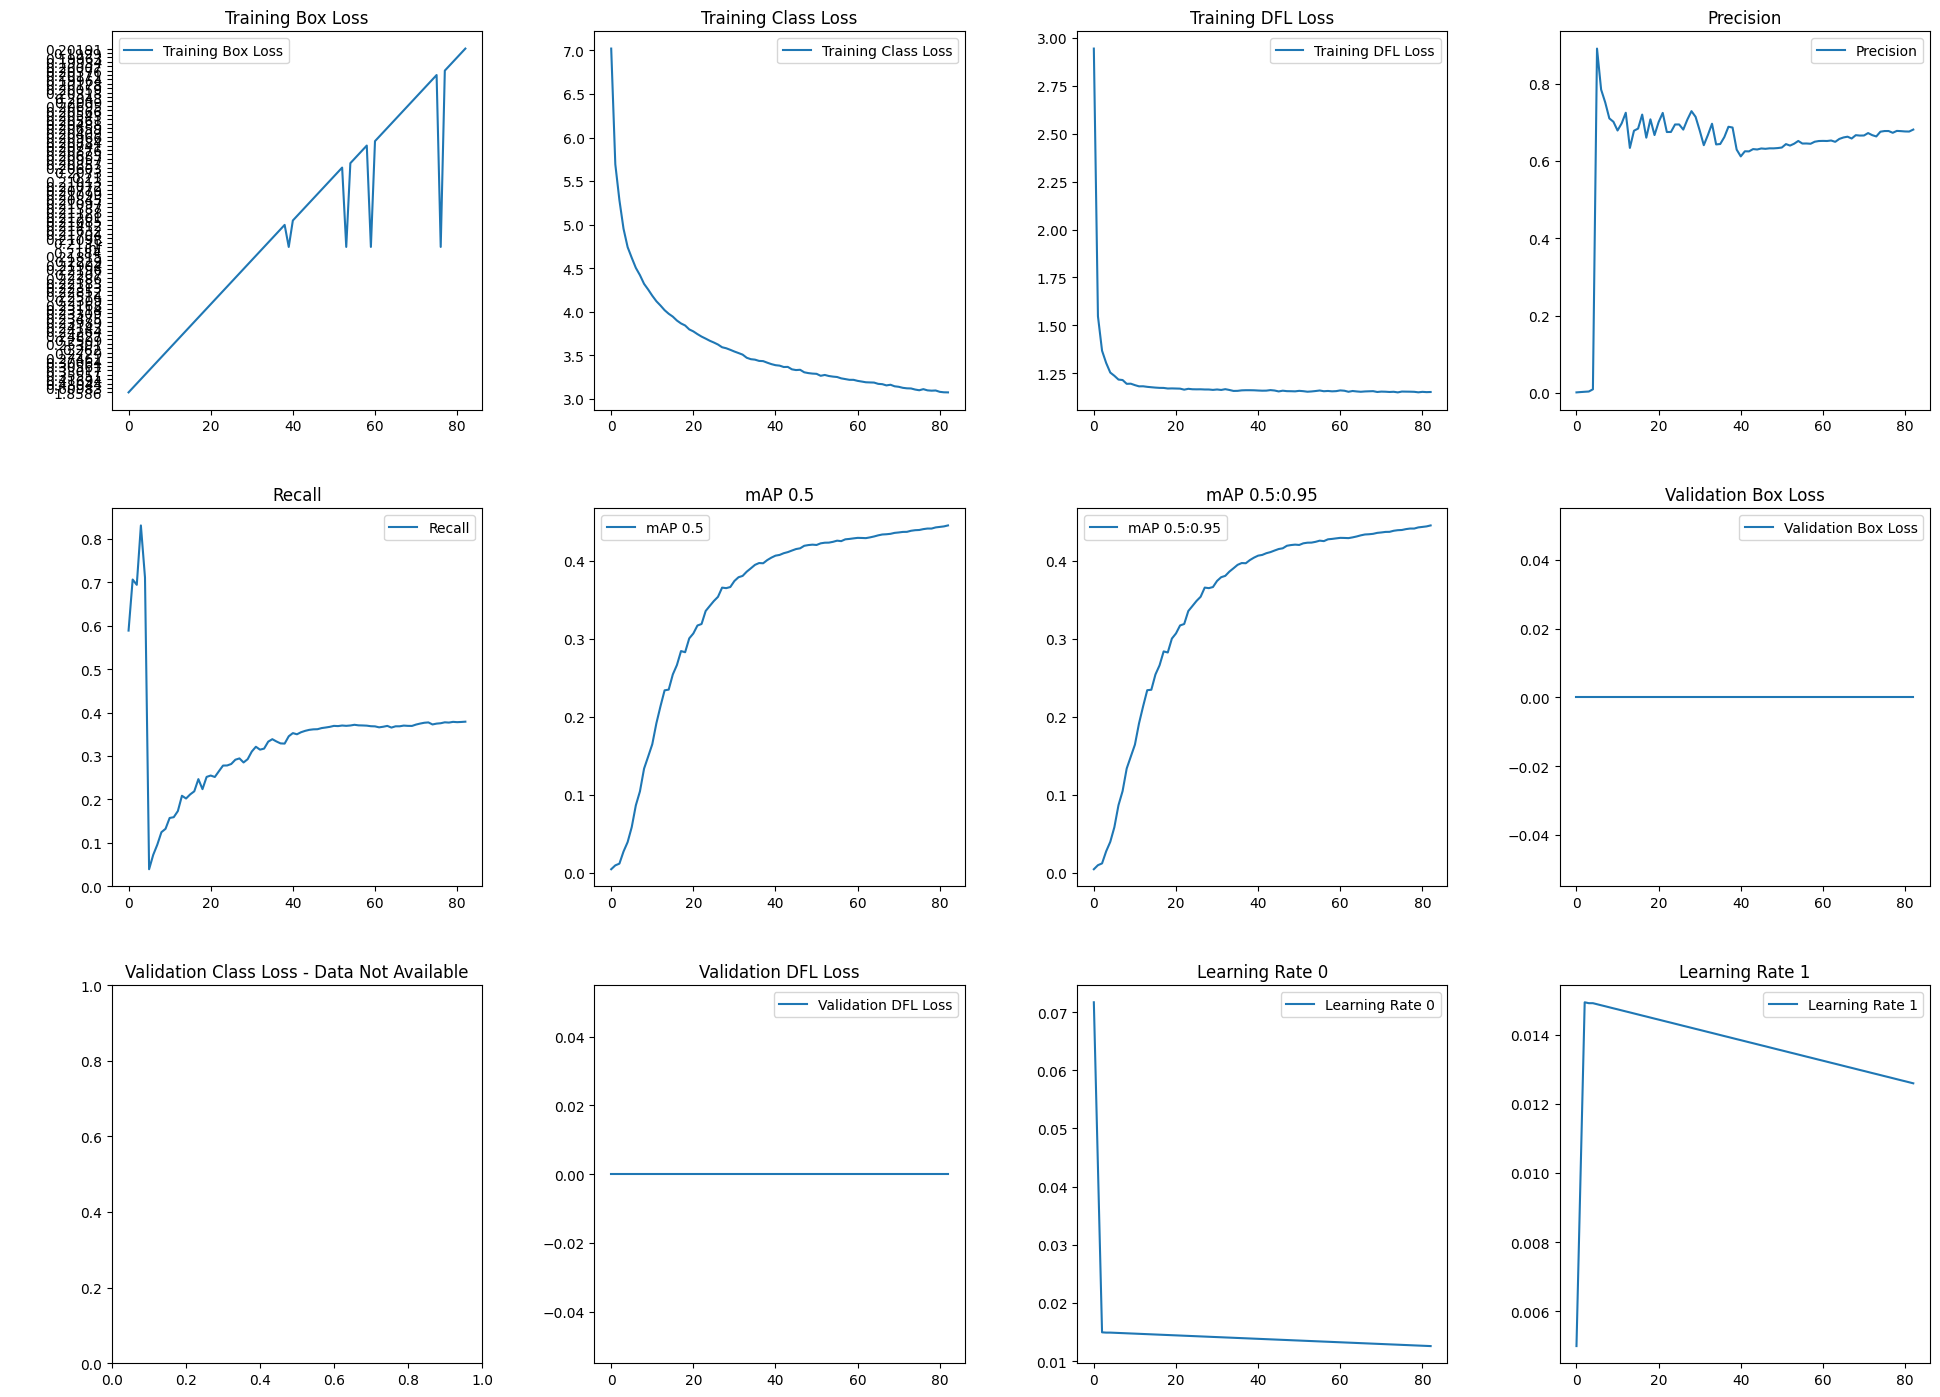

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_data(df):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
    fig.tight_layout(pad=5.0)
    
    metrics = [
        ('train/box_loss', 'Training Box Loss'),
        ('train/cls_loss', 'Training Class Loss'),
        ('train/dfl_loss', 'Training DFL Loss'),
        ('metrics/precision', 'Precision'),
        ('metrics/recall', 'Recall'),
        ('metrics/mAP_0.5', 'mAP 0.5'),
        ('metrics/mAP_0.5:0.95', 'mAP 0.5:0.95'),
        ('val/box_loss', 'Validation Box Loss'),
        ('val/cls_loss', 'Validation Class Loss'),
        ('val/dfl_loss', 'Validation DFL Loss'),
        ('x/lr0', 'Learning Rate 0'),
        ('x/lr1', 'Learning Rate 1'),
        ('x/lr2', 'Learning Rate 2'),
    ]
    
    for ax, (metric, title) in zip(axes.flat, metrics):
        if metric in df.columns:
            ax.plot(df[metric], label=title)
            ax.set_title(title)
            ax.legend()
        else:
            ax.set_title(f"{title} - Data Not Available")
    
    plt.savefig('training_metrics.png')


df = pd.read_csv('./runs/train/yolov9-t-logo3/results.csv')


plot_data(df)
